<div dir="rtl">
    <h2>
       فاز سوم پروژه بازیابی اطلاعات - خوشه‌بندی
    </h2>
</div>
<p></p>
<div dir="rtl">
اعضای گروه: حمیدرضا هدایتی، حامد علی‌محمدزاده، آرمین سعادت‌بروجنی
<p></p><p></p><p></p><p></p>
</div>
<p></p><p></p><p></p><p></p>

<div dir="rtl">
<p></p><p></p><p></p><p></p>
    اجرای این نوتبوک ۲۰ دقیقه زمان می‌برد که ۱۵ دقیقه آن مربوط به تعیین مقدار مناسب hyper_parameter ها است که عملا ۱ بار انجام شود کافی است.
</div>

<div dir="rtl">
    <h3>
       نصب نیازمندی‌های پروژه:
    </h3>
</div>

In [1]:
%cd ../../
%ls

/home/rmool/MIR
classifiers/  data/          IR_files/    __pycache__/      search/
clusterings/  file_handler/  main.py      README.md         venv/
compressor/   helper.py      pagerank/    reports/
crawler/      index/         preprocess/  requirements.txt


In [2]:
!pip install -r requirements.txt
!pip install yellowbrick

<div dir="rtl">
    <h3>
        ایمپورت کردن پکیج‌های مورد نیاز:
    </h3>
</div>

In [3]:
from main import JSON_to_clustering_arrays 
from yellowbrick.cluster import intercluster_distance, kelbow_visualizer
from clusterings import k_means, gmm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from clusterings import hierarchical
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/rmool/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rmool/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<div dir="rtl">
    <h3>
       تحلیل اطلاعات فایل جیسون و ایجاد w2v و tf_idf:
    </h3>
<p></p>    
لینک‌ها خوانده و ذخیره می‌شود. تگ‌های اصلی با شماره ۰ تا ۱۳ ذخیره می‌شود.
<p></p>
summery و title با هم ترکیب شده و به فضایTF_IDF و Word2Vec برده می‌شود.
<p></p>
    برای TF_IDF در گام اول بعد فضا برابر تعداد term ها در نظر گرفته می‌شود. در گام بعد با استفاده از PCA کاهش ابعاد صورت می‌گیرد چرا که فاصله در ابعاد بالا مبنای خوبی برای الگوریتم k_means نیست.
<p></p>
    تبدیل Word2Vec توسط کتابخانه موجود با پارامترهای پیش‌فرض انجام می‌شود. تنها پارامتری که باید تعیین شود ابعاد فضا است که عددی زیر ۱۰۰ در نظر گفته می‌شود.
</div>

In [4]:
tf_idf, w2v, tags, links, df = JSON_to_clustering_arrays("./data/phase3/hamshahri.json")

In [5]:
features_dim = 50
random_state = 12
tf_idf = PCA(features_dim, random_state=random_state).fit_transform(tf_idf)

<div dir="rtl">
    <h2>
        بررسی پارامترهای k_means:
    </h2>
    <p></p>
    KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10, max_iter=300)
    <p></p>
    random_state یک عدد دلخواه تعیین می‌شود تا با ثابت ماندن بقیه پارامترها جواب یکسان گرفته شود.
    <p></p>
    در گام اول تعداد خوشه‌ها (n_clusters) تعیین می‌شود.
</div>

<div dir="rtl">
    <h4>
        محاسبه تعداد خوشه‌ها بدون استفاده از tags:
    </h4>
    <p></p>
    نمودار تابع هزینه (مجموع مجذور فاصله هر نقطه از مرکز) بر حسب تعداد خوشه‌ها رسم می‌شود.
</div>

TF-IDF:


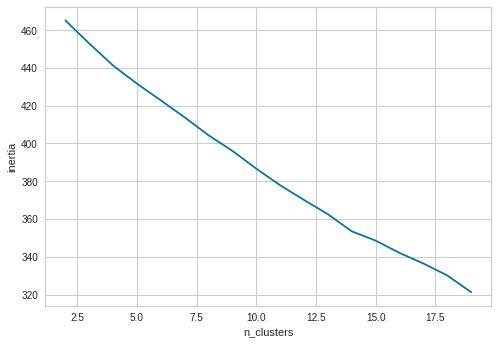

W2v:


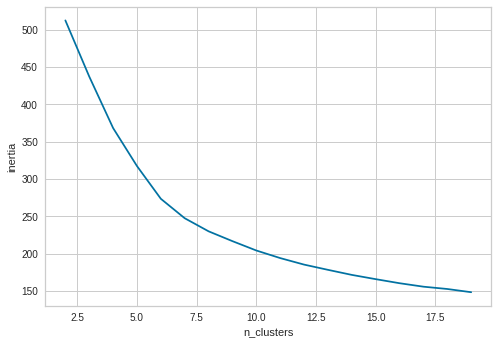

In [6]:
inertia_tfidf = []
for i in range(2, 20):
    inertia_tfidf.append(k_means.get_cost(tf_idf, random_state=random_state, n_clusters=i))
print('TF-IDF:')
ax = sns.lineplot(x=range(2, 20), y=inertia_tfidf);
ax.set(xlabel='n_clusters', ylabel='inertia')
plt.show()

inertia_w2v = []
for i in range(2, 20):
    inertia_w2v.append(k_means.get_cost(w2v, random_state=random_state, n_clusters=i))
print('W2v:')
ax = sns.lineplot(x=range(2, 20), y=inertia_w2v);
ax.set(xlabel='n_clusters', ylabel='inertia')
plt.show()

<div dir="rtl">
    همانطور که انتظار میرفت با افزایش تعداد خوشه‌ها، هزینه کمتر شد. اما به دنبال نقطه‌ای هستیم که کاهش معناداری داشته باشد که از نمودارهای بالا به دست نیامد.
<p></p>
    برای دقت بیشتر و در نظر گرفتن زمان مورد نیاز برای رسیدن به جواب، میتوان از  Elbow method استفاده کرد.
</div>

TF_IDF:


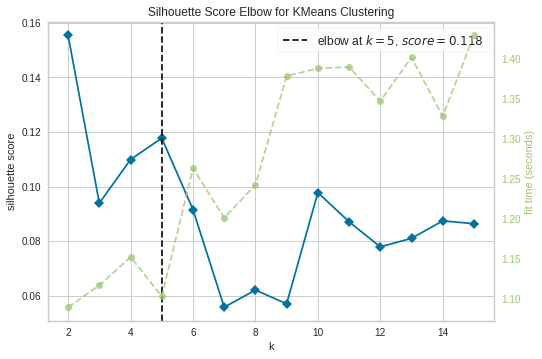

Word2Vec:


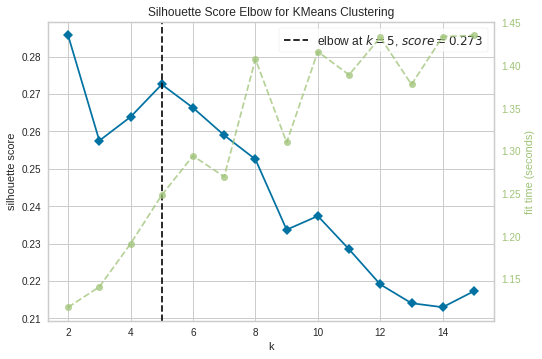

In [7]:
print('TF_IDF:')
_ = kelbow_visualizer(KMeans(random_state=random_state), tf_idf, k=(2,16), metric='silhouette');
print('Word2Vec:')
_ = kelbow_visualizer(KMeans(random_state=random_state), w2v, k=(2,16), metric='silhouette');

<div dir="rtl">
    بنابراین تعداد خوشه‌ها در هر دو روش ۵ به دست آمد.
<p></p>
    با مقدار پیش‌فرض پارامترهای KMeans خوشه‌بندی را انجام داده و نتایج ارزیابی را نمایش می‌دهیم. 
</div>

In [8]:
k_means.get_evaluation_dataframe(tf_idf, w2v, tags, 5, 5)

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
tf_idf,0.290513,0.114225,0.121537,-0.000750,431.672184
w2v,0.493418,0.358668,0.362961,0.196761,317.397079


<div dir="rtl">
    برای افزایش کیفیت خوشه‌بندی، میتوان تعداد ابعاد را کمی بیشتر کرد.
    <p></p>
    در مورد w2v، با افزایش بعد مقدار epoches نیز از ۱۰ به ۳۲ افزایش یافت تا ویژگی‌های جدید بهتر آموخته شوند.
    <p></p>
    مشابه این فرایند برای tf_idf نیز اعمال شد. فضا از ۵۰ به ۴۰۰ تغییر یافت و برای رسیدن به نتیجه مطلوب تعداد حالات بیشتری (با randomness بیشتر ) بررسی شد.
</div>

In [9]:
enhanced_tfidf, enhanced_w2v, tags, links, df = JSON_to_clustering_arrays("./data/phase3/hamshahri.json", tf_idf_features=1000, w2v_min_count=2, w2v_epochs=32, w2v_vector_size=128)

In [10]:
features_dim = 400
enhanced_tfidf = PCA(features_dim, random_state=random_state).fit_transform(enhanced_tfidf)

In [11]:
results, best_random_tfidf, best_random_w2v = k_means.get_advanced_results(enhanced_tfidf, enhanced_w2v, tags, 5, 5)
results

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
tf_idf,0.382660,0.241917,0.247642,0.049169,1614.210608
w2v,0.511575,0.429338,0.433135,0.273713,6165.174746


<div dir="rtl">
    همانطور که مشاهده می‌شود نتایج به شکل معناداری بهبود یافت. دلیل اصلی این بهبود افزایش بعد نیست بلکه اجرای الگوریتم با نقاط شروع متفاوت و با random_state های متفاوت است که باعث می‌شود نقاط بهینه محلی بیشتری را بررسی کرده و بهترین آن‌ها را به عنوان بهینه اصلی انتخاب کند.
    <p></p><p></p>
    در زیر خوشه‌ها بر اساس رنگ مشخص شده‌اند. این نمایش بر حسب ۲ ویژگی بارز شناسایی شده توسط PCA است.
</div>

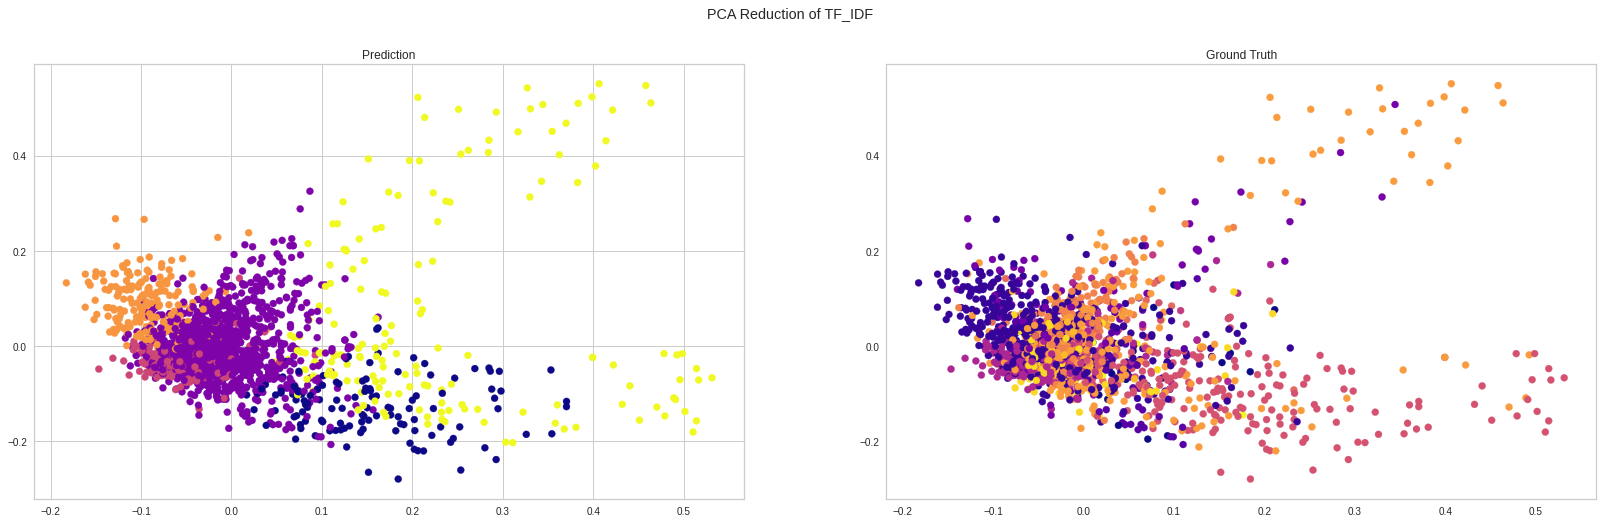

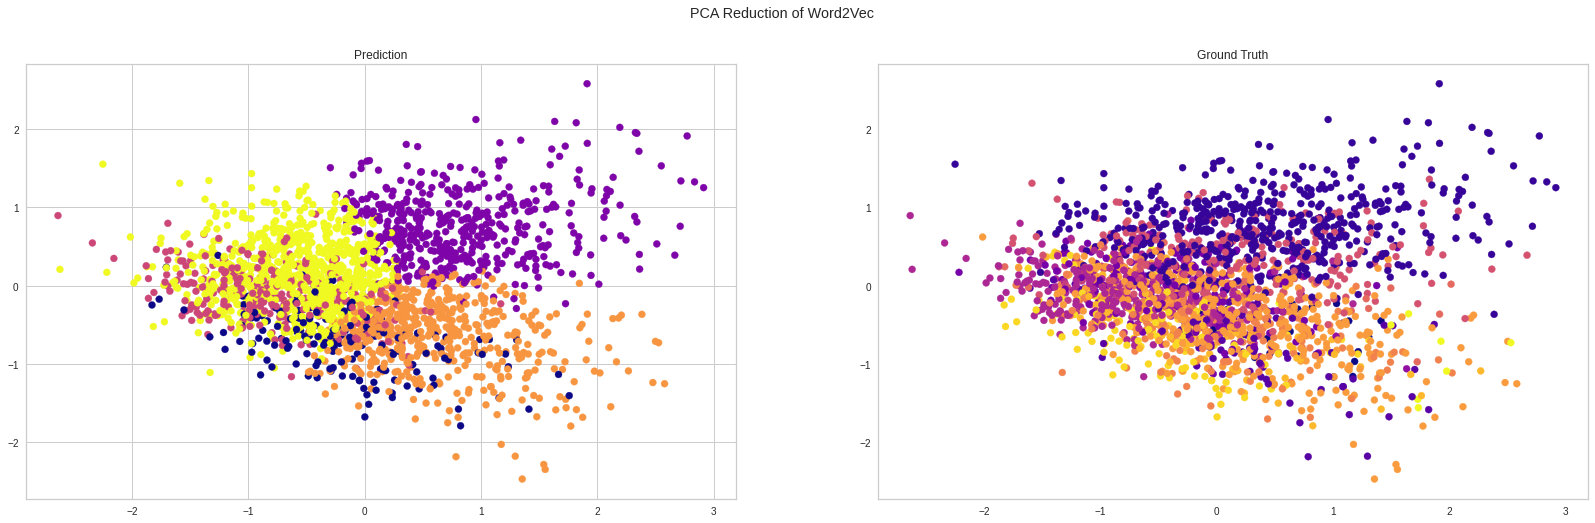

In [12]:
k_means.PCA2_plot(enhanced_tfidf, 5, best_random_tfidf, tags, "PCA Reduction of TF_IDF")
k_means.PCA2_plot(enhanced_w2v, 5, best_random_w2v, tags, "PCA Reduction of Word2Vec")

<div dir="rtl">
    موقعیت خوشه‌ها نسبت به هم با معیار فاصله بین خوشه‌ای به شکل زیر است:
</div>

TF_IDF:


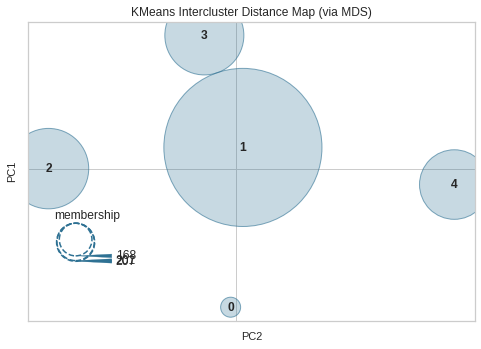

Word2Vec:


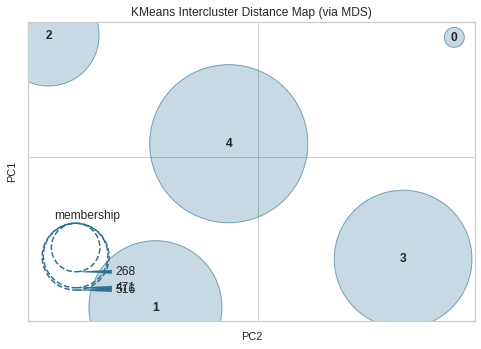

In [13]:
print('TF_IDF:')
_ = intercluster_distance(KMeans(n_clusters=5, random_state=best_random_tfidf), enhanced_tfidf)
print('Word2Vec:')
_ = intercluster_distance(KMeans(n_clusters=5, random_state=best_random_w2v), enhanced_w2v)

<div dir="rtl">
    <h4>
        محاسبه تعداد خوشه‌ها با استفاده از tags:
    </h4>
    <p></p>
    دسته‌های اصلی به عنوان ground truth استفاده می‌شوند. تعداد این دسته‌ها ۱۴ تاست پس تعداد خوشه‌ها برابر ۱۴ هم امتحان می‌کنیم.
</div>

In [14]:
k_means.get_evaluation_dataframe(tf_idf, w2v, tags, 14, 14)

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
tf_idf,0.469360,0.280925,0.294606,0.104216,353.467633
w2v,0.557422,0.368529,0.379164,0.198737,171.635586


<div dir="rtl">
    <h4>
        نتایج برگزیده k_means:
    </h4>
</div>

In [15]:
kmeans_results, best_random_tfidf, best_random_w2v = k_means.get_advanced_results(tf_idf, enhanced_w2v, tags, 14, 14)
kmeans_results

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
tf_idf,0.474353,0.287757,0.300890,0.102612,354.817662
w2v,0.790740,0.629023,0.635328,0.422099,4583.437492


<div dir="rtl">
    مشاهده می‌شود که عملکرد خوشه‌بندی با ۱۴ خوشه بهبود می‌یابد.
</div>

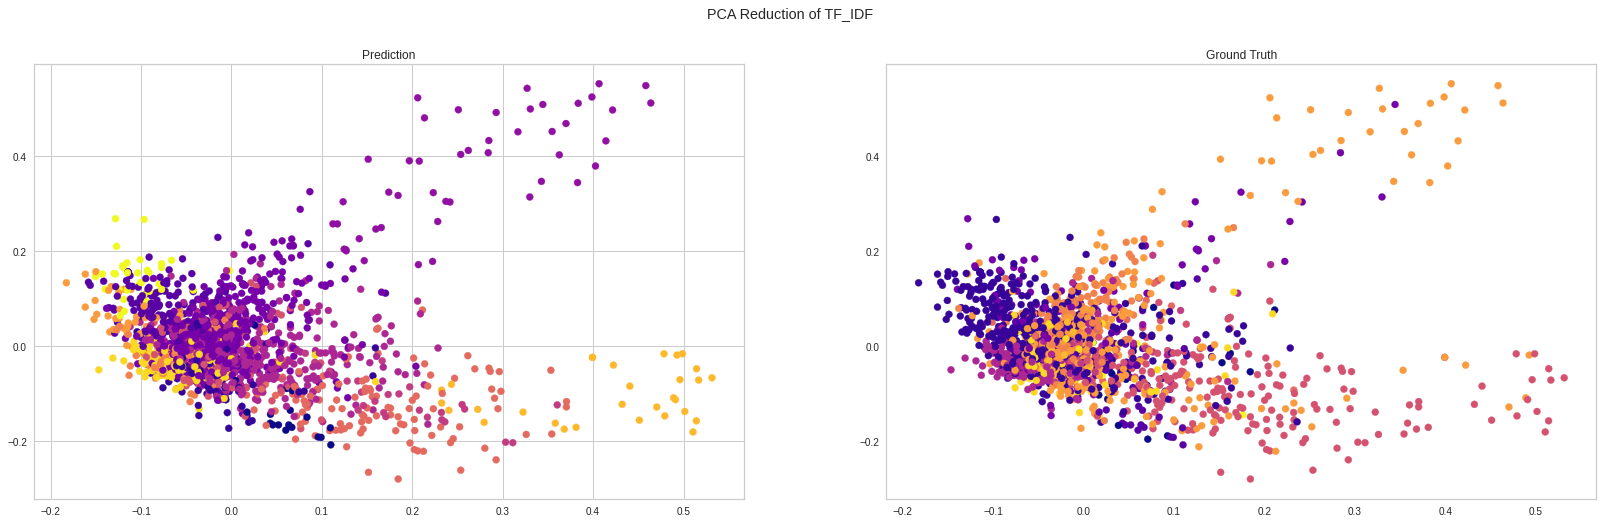

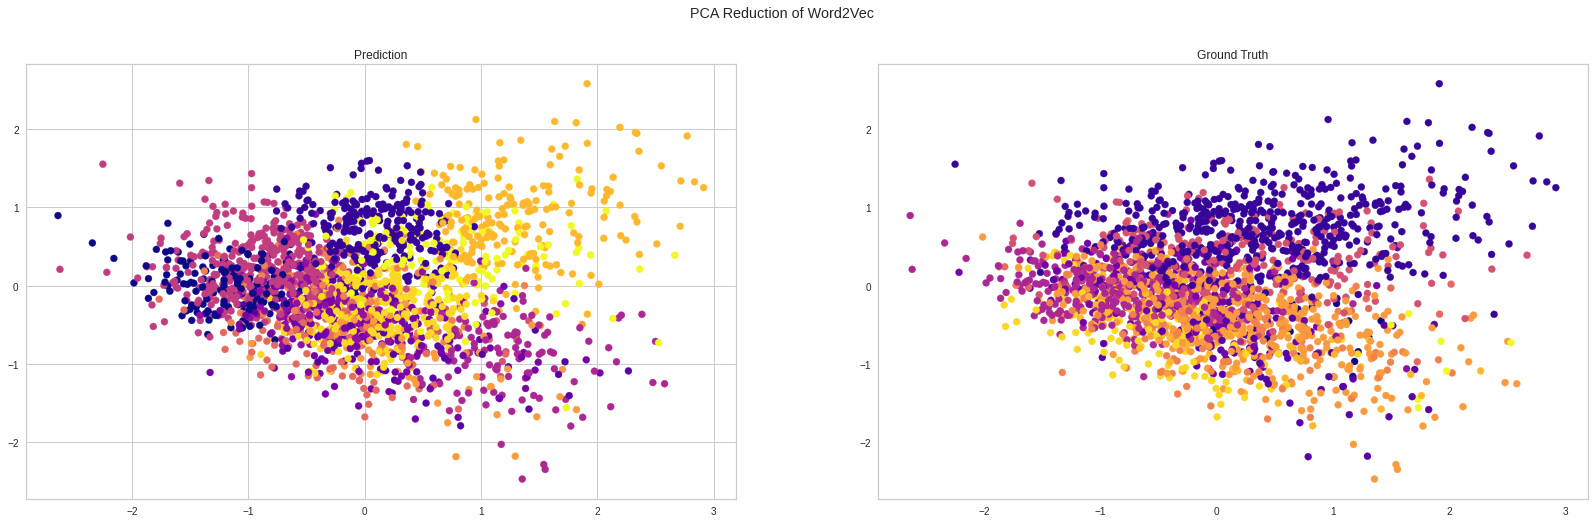

In [16]:
k_means.PCA2_plot(tf_idf, 14, best_random_tfidf, tags, "PCA Reduction of TF_IDF")
k_means.PCA2_plot(enhanced_w2v, 14, best_random_w2v, tags, "PCA Reduction of Word2Vec")

TF_IDF:


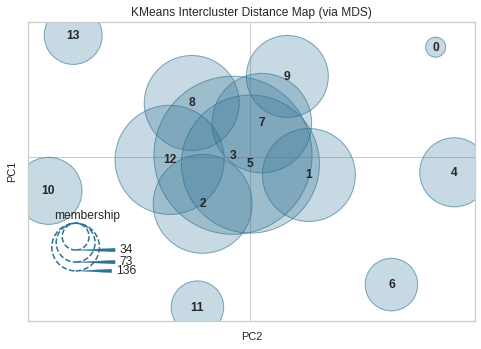

Word2Vec:


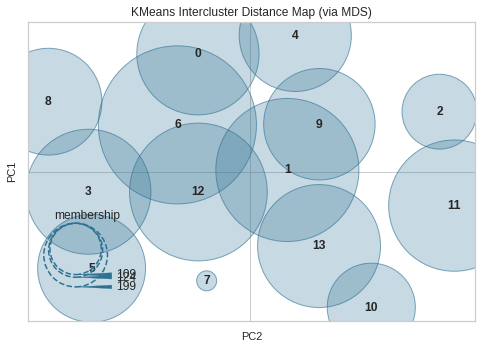

In [17]:
print('TF_IDF:')
_ = intercluster_distance(KMeans(n_clusters=14, random_state=best_random_tfidf), tf_idf)
print('Word2Vec:')
_ = intercluster_distance(KMeans(n_clusters=14, random_state=best_random_w2v), enhanced_w2v)

<div dir="rtl">
    همانطور که از نمودار بالا برداشت می‌شود، روش w2v خیلی بهتر خوشه‌ها را از هم تفکیک کرده است.
</div>

<div dir="rtl">
    <h4>
        بررسی سایر پارامترها: n_init و max_iter
    </h4>
    <p></p>
    تا اینجا این مقادیر به صورت پیش‌فرض به ترتیب ۱۰ و ۳۰۰ بوده‌اند.
    <p></p>
    n_init تعداد بارهایی است که به ازای هر بار صدا زدن تابع KMeans الگوریتم انجام شده و بهترین جواب بازگردانده می‌شود.
    <p></p>
    max_iter حداکثر تعداد مراحلی است که در هر بار اجرای الگوریتم طی می‌شود.
    <p></p>
    <h5>
        بررسی n_init:
    </h5>
</div>

In [18]:
k_means.evaluate_n_init(tf_idf, enhanced_w2v, tags, 14, 14, best_random_tfidf, best_random_w2v, [1, 5, 10, 20, 30])    

,n_init,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
vector,,,,,,
tf_idf,1,0.474353,0.287757,0.300890,0.102612,354.817662
tf_idf,5,0.474353,0.287757,0.300890,0.102612,354.817662
tf_idf,10,0.474353,0.287757,0.300890,0.102612,354.817662
tf_idf,20,0.474353,0.287757,0.300890,0.102612,354.817662
tf_idf,30,0.474353,0.287757,0.300890,0.102612,354.817662
w2v,1,0.765320,0.607937,0.614585,0.393781,4593.096550
w2v,5,0.790740,0.629023,0.635328,0.422099,4583.437492
w2v,10,0.790740,0.629023,0.635328,0.422099,4583.437492
w2v,20,0.790740,0.629023,0.635328,0.422099,4583.437492


<div dir="rtl">
    از آنجا که در کد با چندین random_state حالات مختلف بررسی شده و بهترین آن‌ها انتخاب می‌شود، به نوعی همان کار n_init دارد دستی انجام می‌شود و دیگر تاثیر چندانی ندارد. به جز در یک مورد که برای w2v با n_init=1 مقدار غیر بهینه به دست آمده است که آن هم با تکرار مجدد برطرف می‌شود.
    نتیجه اینکه n_init بیشتر از حدودا ۵ صرفا بار محاسبات را افزایش می‌دهد و تاثیر مثبتی ندارد.
    <p></p>
    <h5>
        بررسی max_iter:
    </h5>
</div>

In [19]:
k_means.evaluate_max_iter(tf_idf, enhanced_w2v, tags, 14, 14, best_random_tfidf, best_random_w2v, [10, 50, 100, 300, 500])    

,max_iter,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
vector,,,,,,
tf_idf,10,0.439855,0.237507,0.251531,0.087962,358.027932
tf_idf,50,0.439855,0.248944,0.263092,0.077077,355.622083
tf_idf,100,0.474353,0.287757,0.300890,0.102612,354.817662
tf_idf,300,0.474353,0.287757,0.300890,0.102612,354.817662
tf_idf,500,0.474353,0.287757,0.300890,0.102612,354.817662
w2v,10,0.782569,0.610550,0.617169,0.396693,4599.664923
w2v,50,0.790740,0.629023,0.635328,0.422099,4583.437492
w2v,100,0.790740,0.629023,0.635328,0.422099,4583.437492
w2v,300,0.790740,0.629023,0.635328,0.422099,4583.437492


<div dir="rtl">
    برای مقادیر ۱۰ و ۵۰ که کمتر از حالت پیش‌فرض هستند مقادیر غیر بهینه به دست آمد. اما برای مقادیر بیشتر از ۱۰۰ الگوریتم قبل از رسیدن به max_iter همگرا شده است. در کل چون در این مسئله خیلی زود همگرایی اتفاق رخ می‌دهد max_iter چندان تاثیری ندارد.
    <p></p>
</div>

<div dir="rtl">
    <h2>
        بررسی پارامترهای gmm:
    </h2>
    <p></p>
    GMM دارای ۲ هایپرپارامتر مهم است: n_components, covariance_type
    <p></p>
    در k_means تعداد خوشه‌ها به صورت تجربی ۵ به دست آمد. از طرفی میدانیم ۱۴ دسته اصلی داریم. پس مقدار n_compenents را بین مقادیر ۵ تا ۱۵ بررسی میکنیم.
    <p></p>
    covariance_type چهار حالت دارد که هر ۴ مورد را بررسی میکنیم: full, tied, diag, spherical
    <p></p>
    این فرآیند برای هر دو حالت enhanced_tfidf و tf_idf انجام می‌شود تا تاثیر بعد فضا هم بررسی شود.
    <p></p>
    این کارها به ازای tf_idf و w2v انجام می‌شود.
    <p></p>
    بنابراین ۲ * ۲ * ۴ * ۱۱ یعنی ۱۷۶ حالت باید بررسی شود.
</div>

In [20]:
AMI_results = gmm.get_result_df(tf_idf, w2v, tags)
AMI_results_higher_dim = gmm.get_result_df(enhanced_tfidf, enhanced_w2v, tags)

In [21]:
AMI_results.query('vector == "tf_idf" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_components,covariance_type,max_iter,score,metric
48,tf_idf,10,full,100,0.286060,AMI
32,tf_idf,9,full,100,0.279462,AMI
112,tf_idf,14,full,100,0.276425,AMI
80,tf_idf,12,full,100,0.273811,AMI
64,tf_idf,11,full,100,0.272865,AMI
96,tf_idf,13,full,100,0.268926,AMI
52,tf_idf,10,tied,100,0.267124,AMI
36,tf_idf,9,tied,100,0.257653,AMI
16,tf_idf,8,full,100,0.256914,AMI
20,tf_idf,8,tied,100,0.252967,AMI


In [22]:
AMI_results.query('vector == "w2v" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_components,covariance_type,max_iter,score,metric
260,w2v,14,tied,100,0.452427,AMI
212,w2v,11,tied,100,0.449991,AMI
276,w2v,15,tied,100,0.449628,AMI
196,w2v,10,tied,100,0.448733,AMI
180,w2v,9,tied,100,0.444622,AMI
228,w2v,12,tied,100,0.434698,AMI
164,w2v,8,tied,100,0.430911,AMI
244,w2v,13,tied,100,0.429020,AMI
152,w2v,5,diag,100,0.404745,AMI
264,w2v,14,diag,100,0.390440,AMI


In [23]:
AMI_results_higher_dim.query('vector == "tf_idf" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_components,covariance_type,max_iter,score,metric
124,tf_idf,14,spherical,100,0.253250,AMI
128,tf_idf,15,full,100,0.251900,AMI
140,tf_idf,15,spherical,100,0.251463,AMI
116,tf_idf,14,tied,100,0.251325,AMI
112,tf_idf,14,full,100,0.250649,AMI
132,tf_idf,15,tied,100,0.249664,AMI
108,tf_idf,13,spherical,100,0.241007,AMI
0,tf_idf,5,full,100,0.240606,AMI
4,tf_idf,5,tied,100,0.236526,AMI
100,tf_idf,13,tied,100,0.233383,AMI


In [24]:
AMI_results_higher_dim.query('vector == "w2v" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_components,covariance_type,max_iter,score,metric
248,w2v,13,diag,100,0.626840,AMI
240,w2v,13,full,100,0.617200,AMI
232,w2v,12,diag,100,0.614823,AMI
200,w2v,10,diag,100,0.613227,AMI
168,w2v,8,diag,100,0.608332,AMI
252,w2v,13,spherical,100,0.603338,AMI
192,w2v,10,full,100,0.602676,AMI
280,w2v,15,diag,100,0.601411,AMI
184,w2v,9,diag,100,0.592470,AMI
220,w2v,11,spherical,100,0.591026,AMI


<div dir="rtl">
    بنابراین برای w2v حالت با فضای بعد بالاتر مناسب است اما برای tf_idf فضای با بعد کمتر بهتر عمل کرد.
    بنابراین w2v با بعد ۱۲۸ و tf_idf با بعد ۵۰ محاسبه خواهد شد.
    <p></p>
    <p></p>
    برای tf_idf با قطعیت حالت full بهتر عمل می‌کند. تعداد خوشه‌ها بین ۹ تا ۱۴ مناسب است و آنچنان فرقی ندارد. چون می‌دانیم ۱۴ دسته اصلی داریم همان ۱۴ را برای تعداد خوشه‌های tf_idf در نظر میگیریم.
    <p></p>
    برای حالت w2v هم diag مناسب به نظر می‌رسد هم full اما diag تصمیم محکم‌تر و به صرفه‌تری است چرا که تعداد پارامتر‌های کمتری دارد. تعداد خوشه‌ها بین ۱۰ تا ۱۳ معقول است. چون میدانیم تعداد دسته‌های اصلی ۱۴ تاست برای w2v تعداد خوشه ۱۳ را انتخاب می‌کنیم که نزدیک‌تر به ۱۴ باشد.
</div>

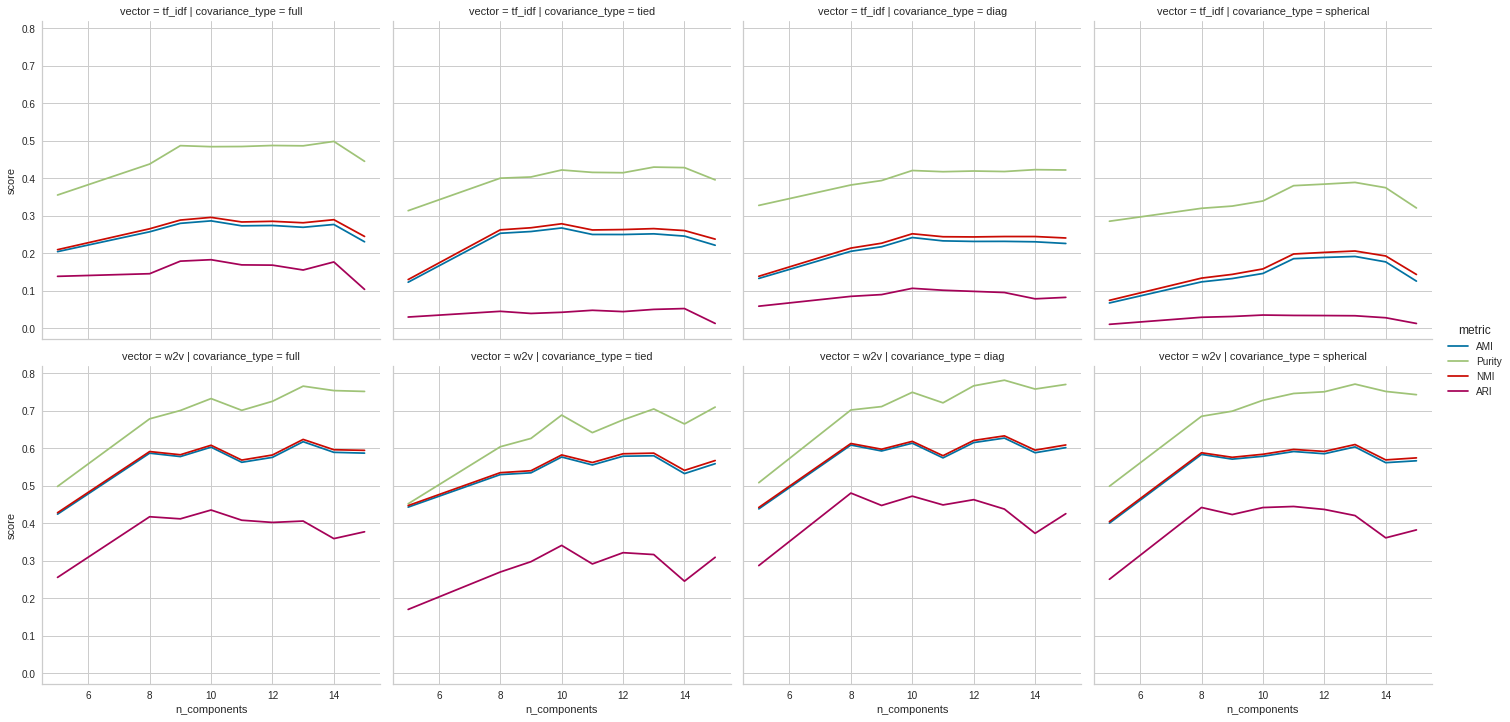

In [25]:
AMI_res = pd.concat([AMI_results.query('vector == "tf_idf"'),AMI_results_higher_dim.query('vector == "w2v"')], axis=0, ignore_index=False)
sns.relplot(data=AMI_res, x='n_components', y='score', row='vector', col='covariance_type', hue="metric", kind='line');

<div dir="rtl">
    <h4>
        بررسی max_iter برای tf_idf:
    </h4>
</div>

In [26]:
max_iters = [50, 100, 200]
for max_iter in max_iters:
    print("max_iter: " + str(max_iter) + " --> AMI: " + str(gmm.get_AMI(tf_idf, tags, 14, 'full', max_iter)))

max_iter: 50 --> AMI: 0.276425
max_iter: 100 --> AMI: 0.276425
max_iter: 200 --> AMI: 0.276425


<div dir="rtl">
    <h4>
        بررسی max_iter برای w2v:
    </h4>
</div>

In [27]:
max_iters = [50, 100, 200]
for max_iter in max_iters:
    print("max_iter: " + str(max_iter) + " --> AMI: " + str(gmm.get_AMI(enhanced_w2v, tags, 14, 'full', max_iter)))

max_iter: 50 --> AMI: 0.58886
max_iter: 100 --> AMI: 0.58886
max_iter: 200 --> AMI: 0.58886


<div dir="rtl">
        بنابراین max_iter تاثیر خاصی ندارد چون خیلی زود همگرا می‌شود و همان مقدار ۱۰۰ برایش مناسب است.
</div>

<div dir="rtl">
    <h4>
        نتایج برگزیده gmm:
    </h4>
</div>

In [28]:
tfidf_param = {'n_components': 14, 'covariance_type': 'full', 'max_iter': 100}
w2v_param = {'n_components': 13, 'covariance_type': 'diag', 'max_iter': 100}

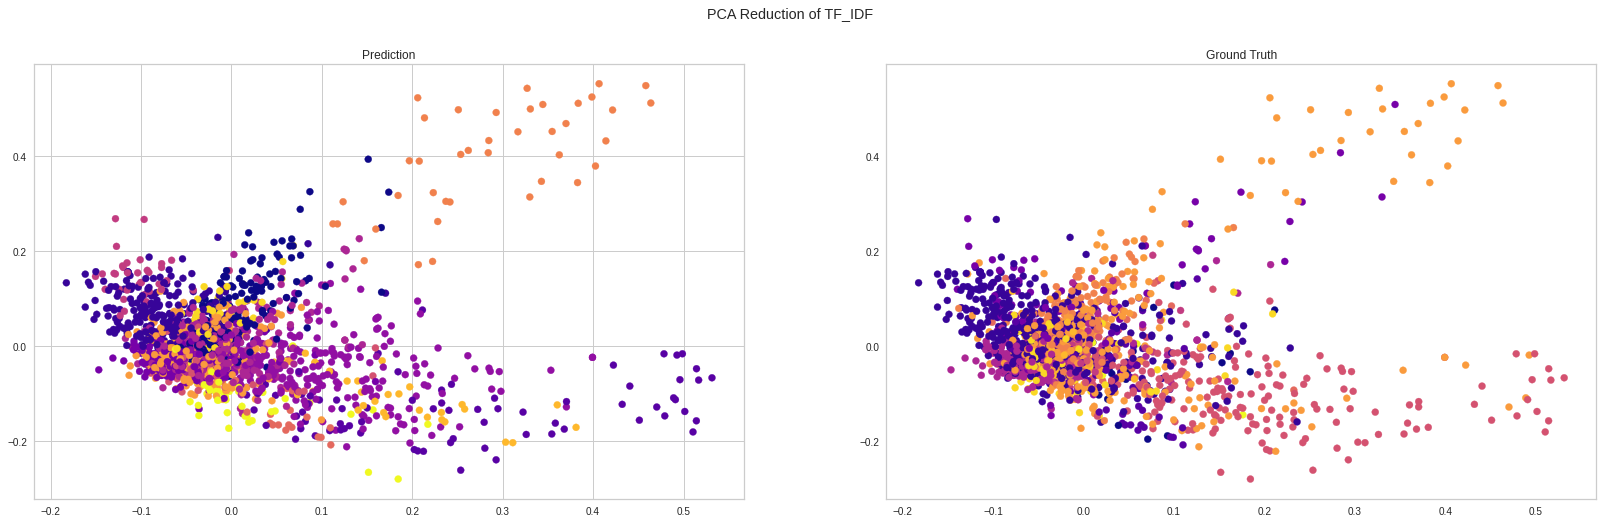

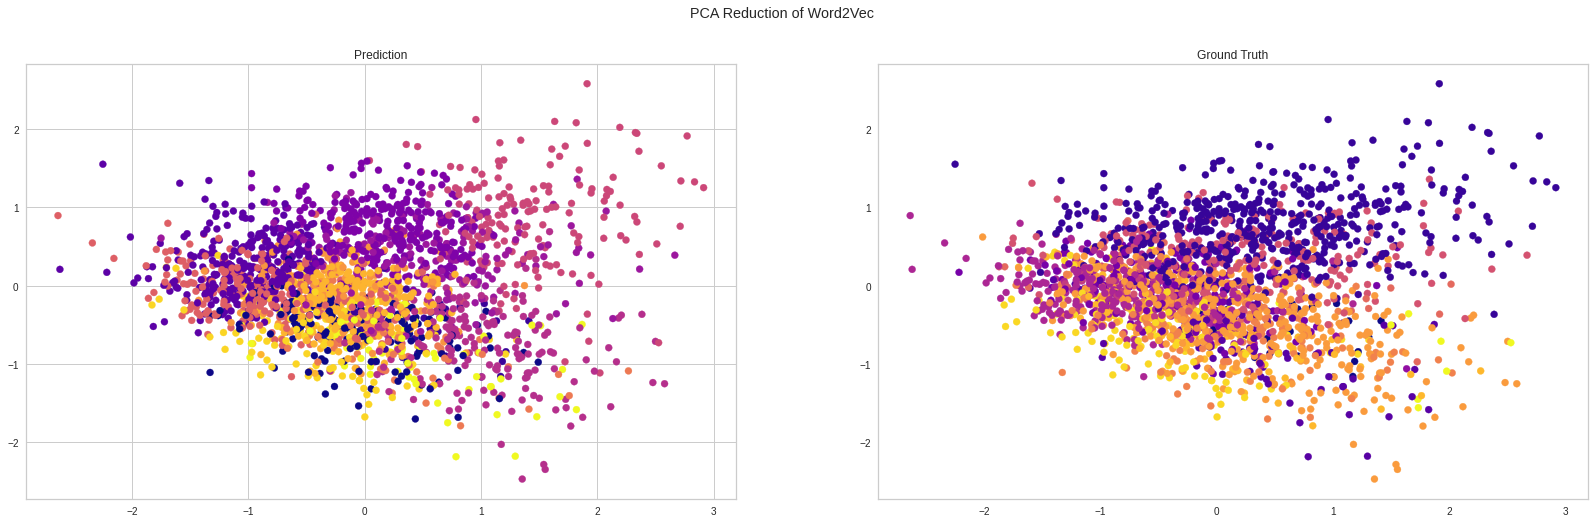

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index
tf_idf,0.497957,0.276425,0.28919,0.176494
w2v,0.797549,0.639671,0.64540,0.488067


In [29]:
gmm_results = gmm.get_evaluation_dataframe(tf_idf, tfidf_param, enhanced_w2v, w2v_param, tags)
gmm_results

<div dir="rtl">
    <h2>
        بررسی پارامترهای hierarchical:
    </h2>
    <p></p>
    از روش AgglomerativeClustering استفاده میکنیم.
    <p></p>
    دارای ۳ هایپرپارامتر مهم است: n_clusters, linkage, affinity
    <p></p>
    در k_means تعداد خوشه‌ها به صورت تجربی ۵ به دست آمد. از طرفی میدانیم ۱۴ دسته اصلی داریم. پس مقدار n_clusters را بین مقادیر ۵ تا ۱۵ بررسی میکنیم.
    <p></p>
    linkage چهار حالت دارد که هر ۴ مورد را بررسی میکنیم: ward, complete, average, single
    <p></p>
    affinity پنج حالت دارد: euclidean, l1, l2, manhattan.
    <p></p>
    این کارها به ازای tf_idf و w2v انجام می‌شود.
    <p></p>
    بنابراین ۲ * ۴ * ۴ * ۱۱ یعنی ۳۵۲ حالت باید بررسی شود.
</div>

In [30]:
AMI_results_hier = hierarchical.get_result_df(tf_idf, enhanced_w2v, tags)

In [31]:
AMI_results_hier.query('vector == "tf_idf" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_clusters,linkage,affinity,score,metric
468,tf_idf,14,ward,euclidean,0.265187,AMI
520,tf_idf,15,ward,euclidean,0.262579,AMI
416,tf_idf,13,ward,euclidean,0.238204,AMI
364,tf_idf,12,ward,euclidean,0.231915,AMI
52,tf_idf,6,ward,euclidean,0.219608,AMI
104,tf_idf,7,ward,euclidean,0.218739,AMI
156,tf_idf,8,ward,euclidean,0.218294,AMI
312,tf_idf,11,ward,euclidean,0.216160,AMI
260,tf_idf,10,ward,euclidean,0.215172,AMI
208,tf_idf,9,ward,euclidean,0.213659,AMI


In [32]:
AMI_results_hier.query('vector == "w2v" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_clusters,linkage,affinity,score,metric
884,w2v,11,ward,euclidean,0.626418,AMI
780,w2v,9,ward,euclidean,0.625794,AMI
936,w2v,12,ward,euclidean,0.621337,AMI
988,w2v,13,ward,euclidean,0.617319,AMI
1092,w2v,15,ward,euclidean,0.615845,AMI
832,w2v,10,ward,euclidean,0.614882,AMI
1040,w2v,14,ward,euclidean,0.607331,AMI
728,w2v,8,ward,euclidean,0.604183,AMI
676,w2v,7,ward,euclidean,0.582195,AMI
624,w2v,6,ward,euclidean,0.559200,AMI


<div dir="rtl">
    <p></p>
    بنابراین می‌توان با قاطعیت گفت که linkaga=ward بهترین گزینه است برای tf_idf و w2v.
    <p></p>
    از طرفی ward تنها با euclidean سازگاری دارد. پس عملا همان حالت پیش‌فرض تابع نتیجه شد.
    <p></p>
    n_clusters برای tf_idf بین ۱۴ و ۱۵ نتیجه خوب داده‌است بنابراین تعداد خوشه‌ها را ۱۴ در نظر میگیرم.
    <p></p>
    برای w2v تعداد خوشه‌ها بین ۹ تا ۱۴ جواب معقول و بهینه‌ای داده‌است اما ۱۱ و ۱۳ بهینه‌تر از بقیه هستند. با توجه به اینکه تعداد دسته‌های اصلی ۱۴ تاست، بین ۱۱ و ۱۳ مقدار ۱۳ را به عنوان تعداد خوشه انتخاب می‌کنیم.
</div>

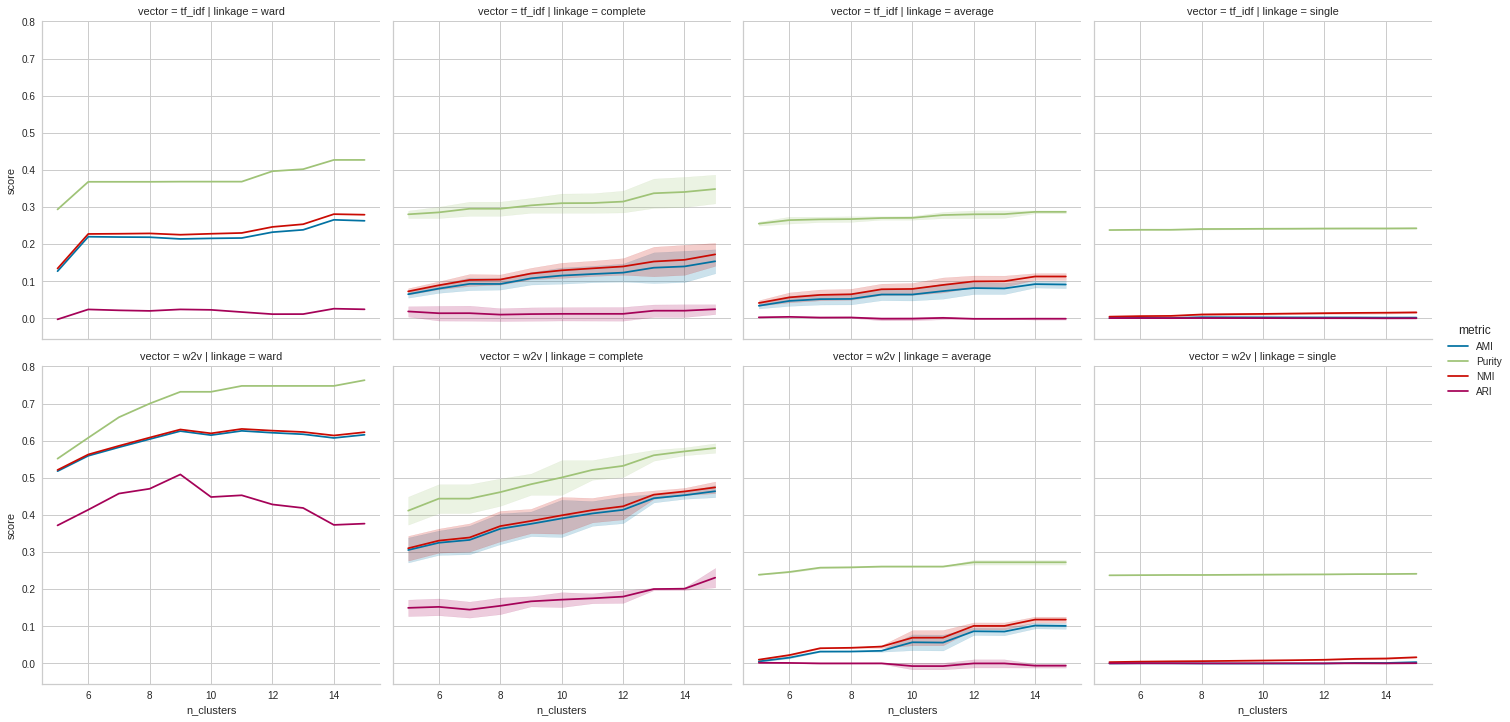

In [33]:
sns.relplot(data=AMI_results_hier, x='n_clusters', y='score', row='vector', col='linkage', hue="metric", kind='line');

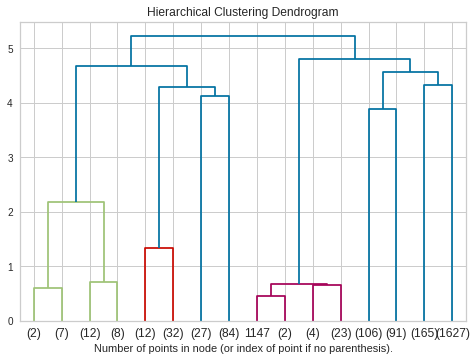

In [34]:
hierarchical.show_dendrogram(tf_idf, 'ward', 'euclidean')

<div dir="rtl">
    در نمودار بالا تعداد دسته‌ها ۱۶ تا است که این عدد نزدیک به تعداد خوشه‌های tf_idf یعنی ۱۴ است. اگر دقت شود دو دسته دارای تنها ۲ عضو هستند که با حذف آن‌ها به همان ۱۴ دسته میرسیم.
</div>

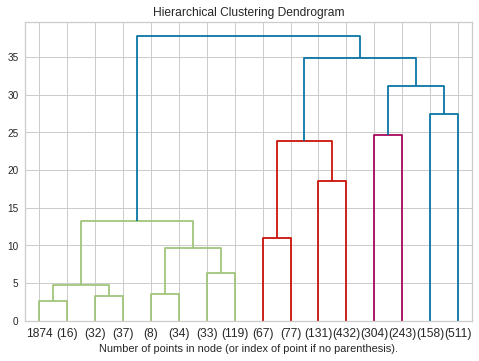

In [35]:
hierarchical.show_dendrogram(enhanced_w2v, 'ward', 'euclidean')

<div dir="rtl">
    در نمودار بالا تعداد دسته‌ها ۱۶ تاست که با مرج کردن دسته‌های زیر ۱۰۰ عضو به ۱۳ دسته میرسیم که همان تعداد خوشه‌های w2v است.
</div>

<div dir="rtl">
    <h4>
        نتایج برگزیده hierarchical:
    </h4>
</div>

In [36]:
tfidf_param = {'n_clusters': 14, 'linkage': 'ward', 'affinity': 'euclidean'}
w2v_param = {'n_clusters': 13, 'linkage': 'ward', 'affinity': 'euclidean'}

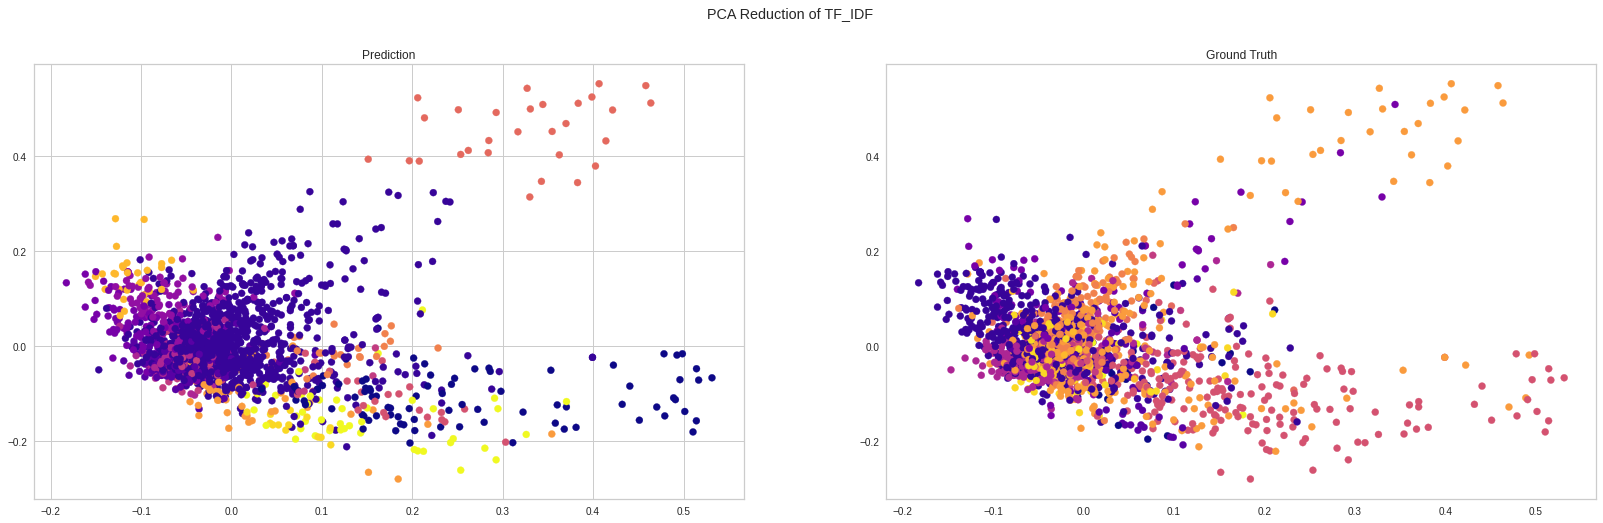

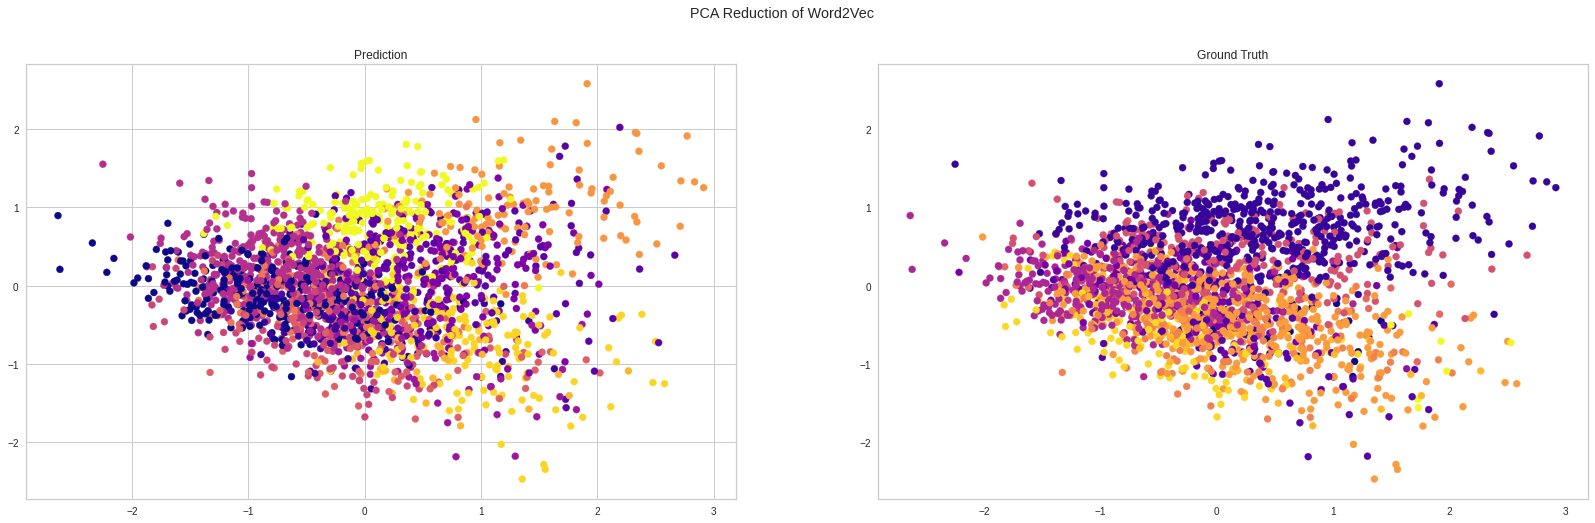

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index
tf_idf,0.426691,0.265187,0.280486,0.025559
w2v,0.747617,0.617319,0.623395,0.418499


In [37]:
hierarchical_results = hierarchical.get_evaluation_dataframe(tf_idf, tfidf_param, enhanced_w2v, w2v_param, tags)
hierarchical_results

<div dir="rtl">
    <h2>
        نتایج نهایی خوشه‌بند‌ها:
    </h2>
</div>

<div dir="rtl">
    <h4>
        پارامترهای برگزیده kmeans:
    </h4>
</div>

In [38]:
kmeans_tfidf_param = {'n_clusters': 14, 'n_init': 10, 'max_iter': 300, 'random_state': best_random_tfidf}
kmeans_w2v_param = {'n_clusters': 14, 'n_init': 10, 'max_iter': 300, 'random_state': best_random_w2v}
kmeans_df = k_means.final(tf_idf, kmeans_tfidf_param, enhanced_w2v, kmeans_w2v_param, tags, links)

<div dir="rtl">
    <h4>
        پارامترهای برگزیده gmm:
    </h4>
</div>

In [39]:
gmm_tfidf_param = {'n_components': 14, 'covariance_type': 'full', 'max_iter': 100}
gmm_w2v_param = {'n_components': 13, 'covariance_type': 'diag', 'max_iter': 100}
gmm_df = gmm.final(tf_idf, gmm_tfidf_param, enhanced_w2v, gmm_w2v_param, tags, links)

<div dir="rtl">
    <h4>
        پارامترهای برگزیده hierarchical:
    </h4>
</div>

In [40]:
hierarchical_tfidf_param = {'n_clusters': 14, 'linkage': 'ward', 'affinity': 'euclidean'}
hierarchical_w2v_param = {'n_clusters': 13, 'linkage': 'ward', 'affinity': 'euclidean'}
hierarchical_df = hierarchical.final(tf_idf, hierarchical_tfidf_param, enhanced_w2v, hierarchical_w2v_param, tags, links)

<div dir="rtl">
    <h4>
        نتایج نهایی:
    </h4>
</div>

In [41]:
pd.concat([kmeans_df, gmm_df, hierarchical_df], axis=0, ignore_index=True)

,method,vector,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index
0,Kmeans,tf_idf,0.474353,0.287757,0.300890,0.102612
1,Kmeans,w2v,0.790740,0.629023,0.635328,0.422099
2,GMM,tf_idf,0.497957,0.276425,0.289190,0.176494
3,GMM,w2v,0.797549,0.639671,0.645400,0.488067
4,Hierarchical,tf_idf,0.426691,0.265187,0.280486,0.025559
5,Hierarchical,w2v,0.747617,0.617319,0.623395,0.418499
